In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import json
import datetime
import wordcloud
from collections import Counter

# 1. GIỚI THIỆU & CÂU HỎI

YouTube (trang web chia sẻ video nổi tiếng thế giới) duy trì danh sách các video thịnh hành nhất trên nền tảng này. Theo tạp chí Variety, “Để xác định video thịnh hành nhất của năm, YouTube sử dụng kết hợp nhiều yếu tố bao gồm đo lường tương tác của người dùng (số lượt xem, lượt chia sẻ, nhận xét và lượt thích). 

Xu hướng giúp người xem biết những gì đang diễn ra trên YouTube và trên thế giới. Xu hướng nhằm hiển thị những video mà nhiều người xem sẽ thấy thú vị. Một số xu hướng có thể dự đoán được, chẳng hạn như bài hát mới của một nghệ sĩ nổi tiếng hoặc đoạn giới thiệu phim mới. Những người khác gây ngạc nhiên, giống như một video lan truyền. Xu hướng không được cá nhân hóa và hiển thị cùng một danh sách các video thịnh hành ở mỗi quốc gia cho tất cả người dùng.

Danh sách các video thịnh hành được cập nhật khoảng 15 phút một lần. Với mỗi lần cập nhật, video có thể di chuyển lên, xuống hoặc giữ nguyên vị trí trong danh sách. Những nghệ sĩ biểu diễn hàng đầu trong danh sách thịnh hành của YouTube là các video ca nhạc (chẳng hạn như "Gangam Style" nổi tiếng), người nổi tiếng và / hoặc các buổi biểu diễn truyền hình thực tế và các video lan truyền ngẫu nhiên của anh chàng có máy ảnh mà YouTube nổi tiếng.

## Câu hỏi:
1. Trending với lượt view: Có bao nhiêu lượt xem khi 1 video lọt top trending?
2. Trending videos titles:
    + Những từ phổ biến trong các title?
    + 2-Gam phổ biến nhất trong title.
3. Video xu hướng được xuất bản khi nào, bao lâu thì video trở thành video xu hướng?
4. Diễn biến lượt xem của các video của 1 kênh có số lượng video thuộc top trend cao nhất?
5. Lượt xem, lượt thích, lượt không thích, số lượt nhận xét, độ dài tiêu đề và các thuộc tính khác có tương quan (liên quan đến) nhau như thế nào? Chúng được kết nối với nhau như thế nào?
6. Danh mục video nào (ví dụ: Giải trí, Trò chơi, Hài, v.v.) có số lượng video thịnh hành nhất?


# 2. ĐỌC DỮ LIỆU

In [2]:
data_df = pd.read_csv("USvideos.csv")

##  Thông tin về dữ liệu

Tập dữ liệu này là bản ghi hàng ngày về các video thịnh hành nhất trên YouTube (năm 2017-2018) mà sử dụng cho lab này là thống kê của US. Được tác giả thu thấp thông qua Youtube API.

Link sưu tầm: https://www.kaggle.com/datasnaek/youtube-new
+ Usage Information
    - License: CC0 Public Domain
    - Visibility:       Public
+ Maintainers
    - Dataset owner: Mitchell J
+ Updates
    - Expected update frequency: Not specified
    - Last updated: 2019-06-03
    - Date created: 2017-11-14
    - Current version: Version 115

# 3. KHÁM PHÁ DỮ LIỆU

In [3]:
data_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


## Kích thước dữ liệu

In [4]:
data_df.shape

(40949, 16)

+ Số dòng: 40949
+ Số cột: 16

## Số lượng video là unique

In [5]:
data_df['video_id'].unique().shape[0]

6351

## Ý nghĩa của mỗi thuộc tính:
+ video_id: biến định danh video
+ trending_date: ngày video lên top trending
+ title: tựa đề của video
+ channel_title: kênh đăng tải video lên Youtube
+ category_id: phân loại id, mỗi nước sẽ có biến phân loại này khác nhau
+ publish_time: ngày video được push lên Youtube
+ tags: Khi tải video lên YouTube, bạn có thể thêm thẻ vào video. Thẻ không được hiển thị trên trang video; bạn có thể thấy chúng bằng cách xem mã nguồn của trang hoặc bằng cách sử dụng các tiện ích mở rộng của trình duyệt như TubeBuddy và vidIQ.
+ views: lượng xem tính đến ngày lên top
+ likes: lượng thích tính đến ngày lên top
+ dislikes: lượng không tính đến ngày lên top
+ comment_count: số bình luận
+ thumbnail_link: link hình ảnh nhỏ của video khi truy cập video, đóng một vai trò quan trọng trong sự thành công của video YouTube vì chúng ảnh hưởng đến tỷ lệ nhấp (số lượng người nhấp vào video của bạn khi họ xem)
+ comments_disabled: ? 
+ ratings_disabled: ?
+ video_error_or_removed: video có lỗi hay bị xóa đi(True nếu có lỗi hoặc bị xóa và ngược lại)
+ description: phần mô tả cho bài đăng

## Mỗi cột có dtype là gì:

In [6]:
col_dtypes=pd.Series(data_df.dtypes,index=data_df.columns)
col_dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

## Miền giá trị của các cột dạng số?

In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

Chúng ta có thể thấy rằng có 40,949 mục nhập trong tập dữ liệu. Chúng ta cũng có thể thấy rằng tất cả các cột trong tập dữ liệu đều hoàn chỉnh (tức là chúng có 40.949 mục nhập không phải null) ngoại trừ cột mô tả có một số giá trị rỗng; nó chỉ có 40.379 giá trị không rỗng.

In [8]:
data_df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


+ Số lượt xem trung bình của một video thịnh hành là 2.360.784. Giá trị trung bình của số lượt xem là 681.861, có nghĩa là một nửa số video thịnh hành có lượt xem nhỏ hơn con số đó và nửa còn lại có lượt xem lớn hơn con số đó
+ Số lượt thích trung bình của một video thịnh hành là 74.266, trong khi số lượt không thích trung bình là 3.711. 
+ Số bình luận trung bình là 8.446 trong khi trung bình là 1.856

## Năm thu thập dữ liệu

In [9]:
data_df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts(normalize=True)

2018    0.765562
2017    0.234438
Name: trending_date, dtype: float64

Chúng ta có thể thấy rằng tập dữ liệu được thu thập vào năm 2017 và 2018. Trong đó năm 2018 là chủ yếu.

# 4. TIỀN XỬ LÍ

## Cột mô tả có một số giá trị rỗng. Chúng ta có thể thấy rằng các giá trị null được ký hiệu là NaN

In [10]:
data_df["description"] = data_df["description"].fillna(value="")

## Truy xuất danh muc/thể loại của các video mà theo tiêu chuẩn ở US, thay thế cột 'categoryId' thành 'category'.

Danh mục phận loại này được cung cấp chung với dữ liệu: US_category_id.json

In [11]:
#Tham khảo code: https://www.datacamp.com/community/tutorials/json-data-python?utm_source=adwords_ppc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=332602034358&utm_targetid=aud-299261629574:dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=1028581&gclid=Cj0KCQjws536BRDTARIsANeUZ59jJ9yzfjnsGBS0N-Vrfgo0X310RzopRJcnzPN3rkJArMzehAu7Ty8aAvkNEALw_wcB
with open("US_category_id.json") as f:
    categories = json.load(f)["items"]
    #print(categories)
cat_dict = {}
for cat in categories:
    cat_dict[int(cat["id"])] = cat["snippet"]["title"]#Từ id truy xuất đến title(trong snippet) là thể loại video.
data_df['category_name'] = data_df['category_id'].map(cat_dict)#Tạo cột mới

## Ta thấy cột publish_time chứa cả thời gian ngày vào giờ đăng video. Ta cần tách date và time thành 2 cột mới cho dữ liệu này.

In [12]:
data_df['publish_time'] = pd.to_datetime(data_df['publish_time'])

In [13]:
data_df["publishing_day"] = data_df["publish_time"].dt.day_name()
data_df["publishing_hour"] = data_df["publish_time"].dt.hour

## Chuyển giá trị trending_date thành đúng định dạng datetime

In [14]:
data_df['trending_date'] = pd.to_datetime(data_df['trending_date'], format='%y.%d.%m')

## Drop một số cột không cần thiết

In [15]:
data_df.drop(['category_id','thumbnail_link','comments_disabled','ratings_disabled','video_error_or_removed'], axis=1, inplace=True)

In [16]:
data_df.head(1).transpose()

,0
video_id,2kyS6SvSYSE
trending_date,2017-11-14 00:00:00
title,WE WANT TO TALK ABOUT OUR MARRIAGE
channel_title,CaseyNeistat
publish_time,2017-11-13 17:13:01+00:00
tags,SHANtell martin
views,748374
likes,57527
dislikes,2966
comment_count,15954


# 5. Phân tích dữ liệu để trả lời các câu hỏi 

## 1. Có bao nhiêu lượt xem khi 1 video lọt top trending?

Bước 1: Cần tìm ra các video thuộc top trend, cần là video duy nhất vì có thể 1 video có thể được thống kê trùng lặp do ở trong top nhiều ngày.

Do có nhiều video xuất hiện trong danh sách thịnh hành trong hơn một ngày. Bây giờ muốn xem xét lần xuất hiện đầu tiên của mỗi video. Chúng tôi muốn biết video thịnh hành có bao nhiêu lượt xem khi video đó trở thành xu hướng lần đầu tiên.

Bước 2: Dựa vào số lượt xem, vẽ biểu đồ hist tương ứng

In [17]:
cdf = data_df.drop_duplicates(subset=['video_id'])

Text(0.5, 1.0, 'Biểu đồ thể hiện có bao nhiêu video có lượng xem khi đạt mốc trending')

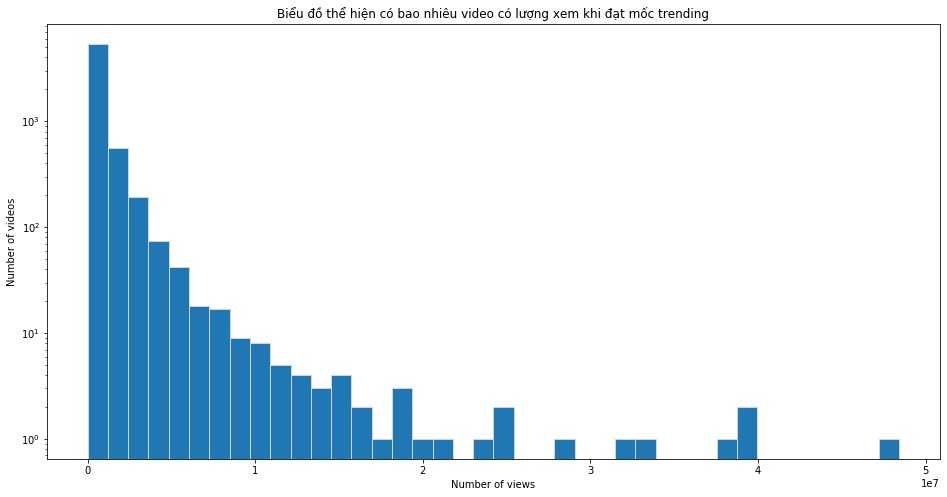

In [18]:
plt.figure(figsize=(16,8))
cdf = data_df.drop_duplicates(subset=['video_id'])
cdf['views'].min()
cdf['views'].plot(kind='hist', bins=40, logy=True, ec='lightgray')# y được chia tỷ lệ log. Đó là 10, 100, 1000… không phải 10, 20, 30…
plt.xlabel('Number of views')
plt.ylabel('Number of videos')
plt.title('Biểu đồ thể hiện có bao nhiêu video có lượng xem khi đạt mốc trending')

In [19]:
cdf['views'].describe()

count    6.351000e+03
mean     7.582096e+05
std      1.928993e+06
min      5.490000e+02
25%      8.351100e+04
50%      2.709020e+05
75%      7.512665e+05
max      4.843165e+07
Name: views, dtype: float64

## 2. Những từ phổ biến trong các title?

Để tìm được các từ này:

Bước 1: Tách các từ ra từ title để tạo được 1 từ điển từ.

Bước 2: Gọi hàm Counter để đếm tần suất xuất hiện của các từ. Lấy 25 từ phổ biến nhất

Bước 3: Trực quan hóa tần xuất của các từ bằng wordcloud

In [20]:
title_words = list(data_df["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(25)

[('-', 11452),
 ('|', 10663),
 ('The', 5762),
 ('the', 3610),
 ('a', 2566),
 ('to', 2343),
 ('of', 2338),
 ('in', 2176),
 ('A', 2122),
 ('&', 2024),
 ('I', 1940),
 ('and', 1917),
 ('Video)', 1901),
 ('Trailer', 1868),
 ('How', 1661),
 ('with', 1655),
 ('2018', 1613),
 ('(Official', 1594),
 ('Official', 1554),
 ('on', 1552),
 ('To', 1397),
 ('You', 1254),
 ('My', 1080),
 ('for', 1020),
 ('ft.', 1017)]

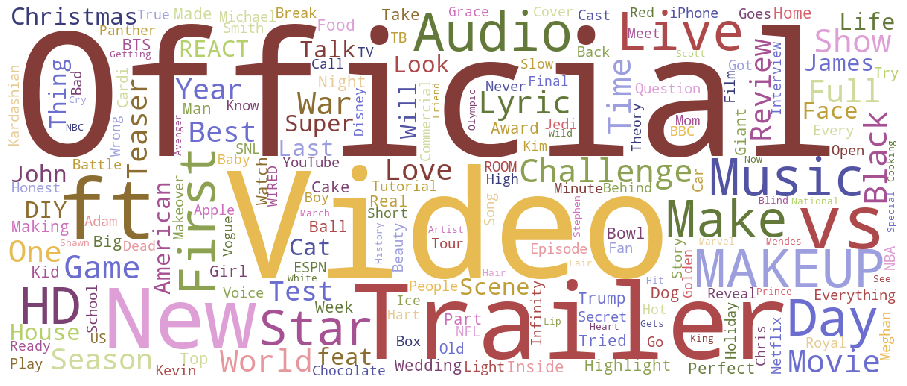

In [21]:
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(16,10))
plt.imshow(wc) 
plt.axis("off") 
plt.show() 

Một đám mây từ cho tiêu đề của các video thịnh hành của --> đây là một cách để hình dung hầu hết các từ phổ biến trong tiêu đề, từ càng phổ biến, kích thước phông chữ của nó càng lớn

## 3. Video thịnh hành được đăng khi nào, bao lâu thì video trở thành video xu hướng?

Bước 1: Tính số ngày bằng cách lấy ngày đầu tiên lọt vào trend - ngày được tải (days)

Bước 2: Vẽ biểu đồ boxplot

Bước 3: Mở rộng thêm liệu tốc độ lên trend nhanh hay chậm có liên gì đến thứ trong tuần hay không?

In [22]:
tdf = data_df.drop_duplicates(subset=['video_id'])
days = (tdf['trending_date'].dt.date - tdf['publish_time'].dt.date).dt.days

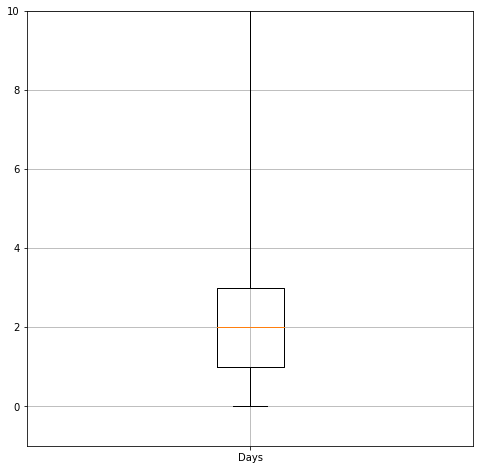

In [23]:
fig, ax = plt.subplots(figsize=(8,8))
plt.boxplot(days, whis=(0, 100),labels=['Days'])
plt.ylim((-1,10))
plt.grid();

In [24]:
days.describe()

count    6351.000000
mean       22.520548
std       209.963344
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max      4215.000000
dtype: float64

In [25]:
days.quantile(q=0.97)

8.0

Video mất trung bình 22 ngày để trở thành xu hướng. Và 97% video đã xuất hiện trong danh sách thịnh hành trong vòng chưa đầy 8 ngày sau khi chúng được xuất bản.

Mở rộng: Bây giờ chúng ta có thể biết những ngày nào trong tuần có số lượng video thịnh hành lớn nhất

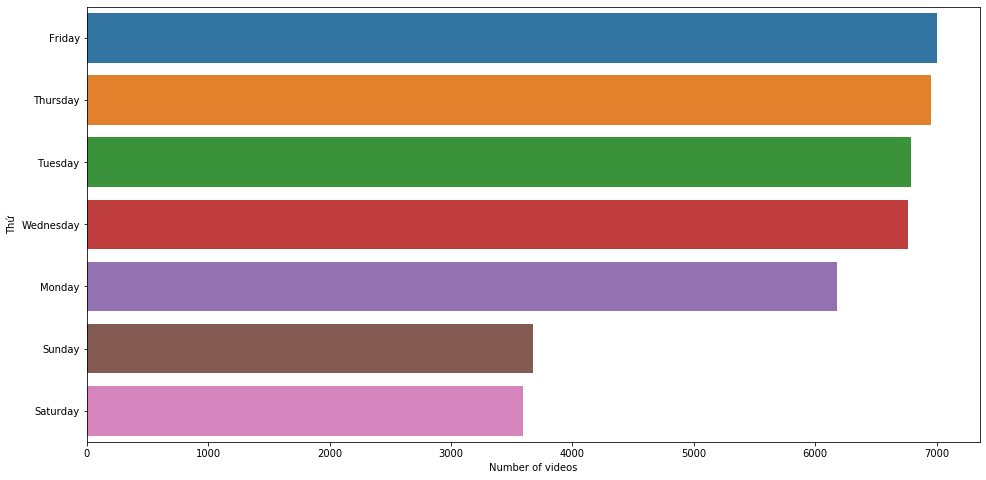

In [26]:
fig, ax = plt.subplots(figsize=(16,8))

day_of_week = data_df["publishing_day"].value_counts(sort=True)
sns.barplot(day_of_week.values, day_of_week.index.values, ax=ax);
plt.ylabel('Thứ')
plt.xlabel('Number of videos');

+ Chúng ta có thể thấy rằng số lượng video thịnh hành được xuất bản vào Chủ Nhật và Thứ Bảy ít hơn đáng kể so với số lượng video thịnh hành được xuất bản vào các ngày khác trong tuần.
+ Có ý kiến cho rằng video post lên vào 2 ngày nghỉ thì sẽ lên top nhanh hơn, nhưng đó với US thì cho ra kết quả không đúng với giả thuyết này. Có thể vào 2 ngày này nhân viên không đi làm hay không dành thời gian cho Youtube.

## 4. Diễn biến lượt xem của các video của 1 kênh có số lượng video thuộc top trend cao nhất?

Bước 1: Cần tìm ra kênh nào có số lượng video thuộc danh sách nhiều nhất?

Bước 2: Tìm ra số views của các video của kênh này theo ngày

Bước 3: Vẽ biểu đồ scatter.

In [27]:
tdf = data_df.groupby('channel_title')['video_id'].agg('count').sort_values(ascending=False)
big_channel = tdf.index[0]
tdf

channel_title
ESPN                                      203
The Tonight Show Starring Jimmy Fallon    197
Vox                                       193
TheEllenShow                              193
Netflix                                   193
                                         ... 
chris lee                                   1
David Seymour                               1
David Steuer                                1
Dean Anderson                               1
Science vs Cinema                           1
Name: video_id, Length: 2207, dtype: int64

In [28]:
# Tìm video của channel lớn nhất:
video_of = data_df[(data_df['channel_title']==big_channel) & (data_df['trending_date'].dt.year == 2018) |\
                   (data_df['trending_date'].dt.year == 2017) ]
video_of.head()

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,description,category_name,publishing_day,publishing_hour
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,Monday,17
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,"One year after the presidential election, John...",Entertainment,Monday,7
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy,Sunday,19
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,2017-11-13 11:00:04+00:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,Today we find out if Link is a Nickelback amat...,Entertainment,Monday,11
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,I know it's been a while since we did this sho...,Entertainment,Sunday,18


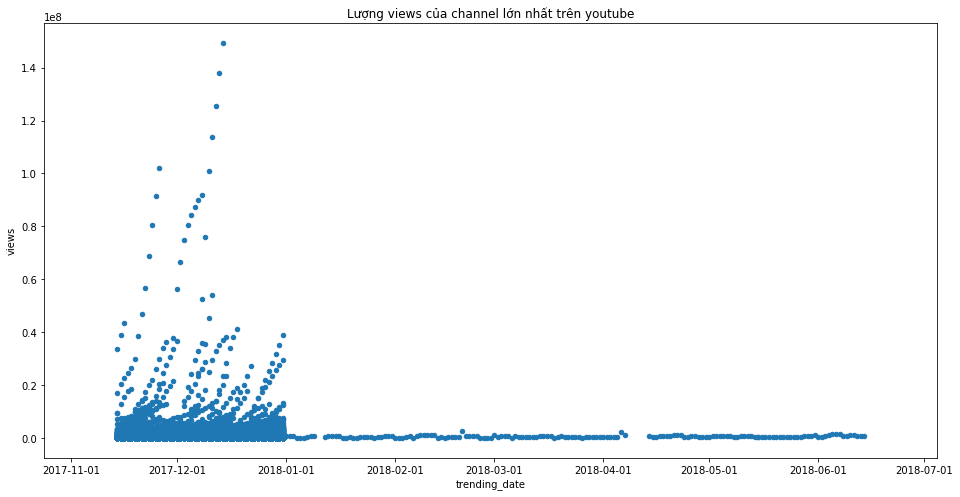

In [29]:
ax = video_of.plot.scatter(x="trending_date", y="views",figsize=(16,8))
ax.get_xticks()
ax.set_xticks(ax.get_xticks()[::1])
plt.title('Lượng views của channel lớn nhất trên youtube');

Qua biểu đồ trên ta thấy rằng:
+ Kênh lớn nhất trên youtube không phải sẽ có số video và lượt xem cao trãi dài khoảng thời gian.
+ Tùy vào thời điểm mà sản phẩm của 1 kênh có thể thành công hay thất bại
+ Kênh đăng tải của nên đưa ra chiến lược phát triển phù hợp.

## 5. Lượt xem, lượt thích, lượt không thích, số lượt nhận xét, độ dài tiêu đề và các thuộc tính khác có tương quan (liên quan đến) nhau như thế nào? Chúng được kết nối với nhau như thế nào?

Bây giờ chúng ta hãy xem các biến tập dữ liệu có tương quan với nhau như thế nào: ví dụ, chúng ta muốn xem lượt xem và lượt thích có tương quan như thế nào, nghĩa là lượt xem và lượt thích có tăng và giảm cùng nhau không (tương quan thuận)? Một trong số chúng tăng lên khi cái kia giảm và ngược lại (tương quan nghịch)? Hay chúng không tương quan với nhau?

In [30]:
data_df.corr()

,views,likes,dislikes,comment_count,publishing_hour
views,1.000000,0.849177,0.472213,0.617621,-0.064916
likes,0.849177,1.000000,0.447186,0.803057,-0.045296
dislikes,0.472213,0.447186,1.000000,0.700184,-0.009750
comment_count,0.617621,0.803057,0.700184,1.000000,-0.017421
publishing_hour,-0.064916,-0.045296,-0.009750,-0.017421,1.000000


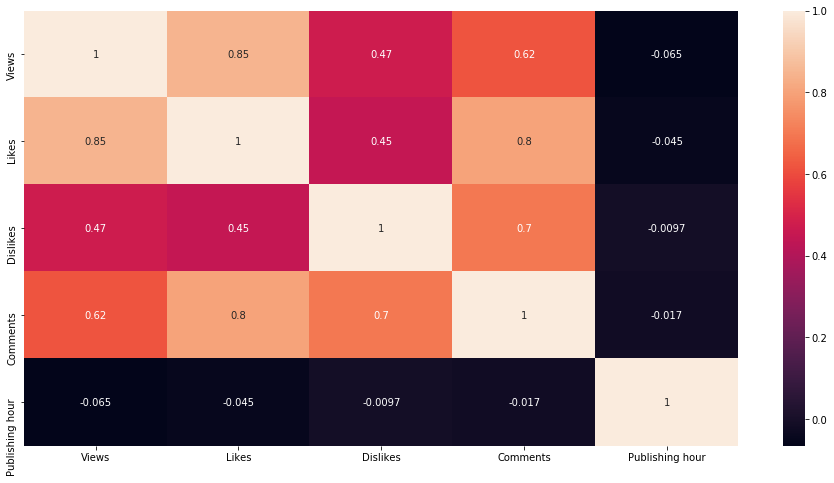

In [31]:
heatmap_columns = ['views', 'likes', 'dislikes', 'comment_count', 'publishing_hour']

_labels = ['Views', 'Likes', 'Dislikes', 'Comments','Publishing hour']

fig, ax = plt.subplots(figsize=(16,8))
sns.heatmap(data_df[heatmap_columns].corr(), annot=True, xticklabels=_labels, yticklabels=_labels);

Chúng ta có thể thấy rằng có mối tương quan thuận cao (0,85) giữa lượt xem và lượt thích. Điều này có nghĩa là chúng có xu hướng tăng cùng nhau trong các video thịnh hành.

Text(0.5, 1.0, 'Mối quan hệ giữa views và likes')

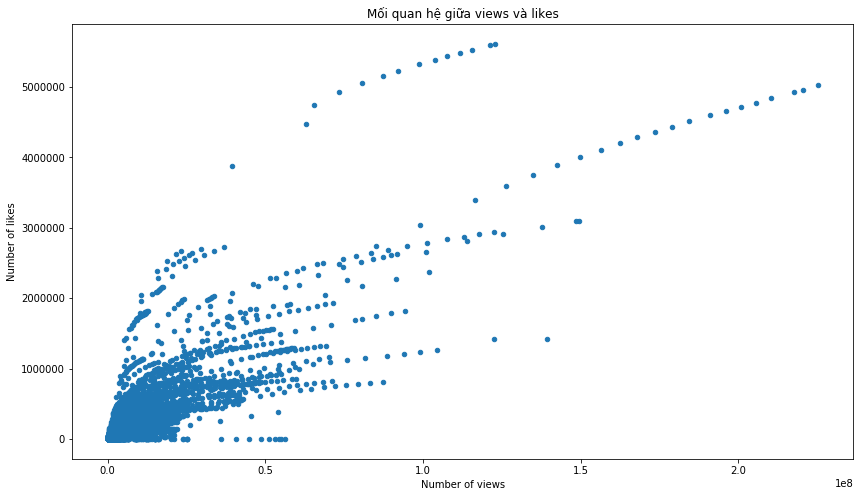

In [32]:
ax = data_df.plot(kind='scatter', x='views', y='likes', figsize=(14,8))
plt.xlabel('Number of views')
plt.ylabel('Number of likes')
plt.title('Mối quan hệ giữa views và likes')

Chúng ta cũng có thể nhận thấy mối tương quan thuận đáng kể (0,62) giữa bình luận và lượt xem.

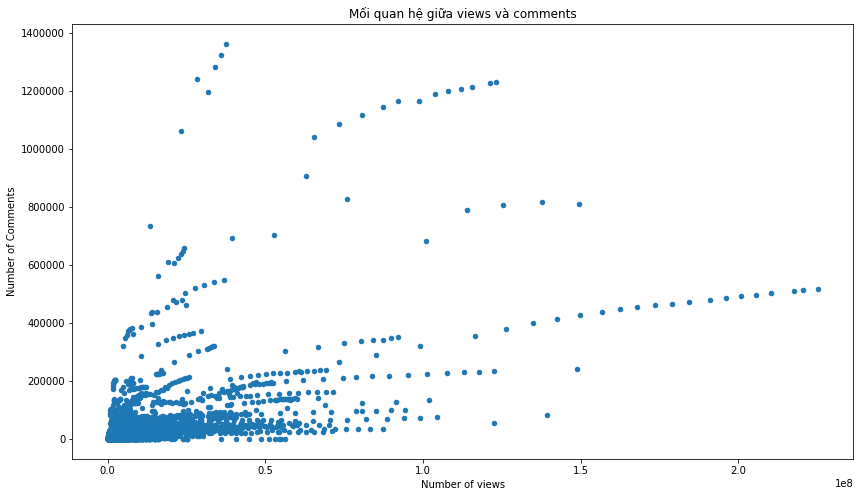

In [33]:
ax = data_df.plot(kind='scatter', x='views', y='comment_count', figsize=(14,8))
plt.xlabel('Number of views')
plt.ylabel('Number of Comments')
plt.title('Mối quan hệ giữa views và comments');

Ngoài ra, có một mối tương quan tích cực đáng kể giữa nhận xét và lượt thích và giữa nhận xét và không thích.

--> Vậy việc trả lời cho câu hỏi này nhằm đáp ứng cho ta hiểu được mối liên hệ giữa các thành phần của 1 video top trending. Người dùng cũng sẽ thông qua đó để dánh giá sản phẩm của mình, có định hướng phát triển sản phẩm tốt hơn trong tương lai.

## 6. Danh mục video nào (ví dụ: Giải trí, Trò chơi, Hài, v.v.) có số lượng video thịnh hành nhất?

Bước 1: Điếm các giá trị của từng loại video

Bước 2: Vẽ biều đồ cột ngang thể hiện cho câu hỏi này.

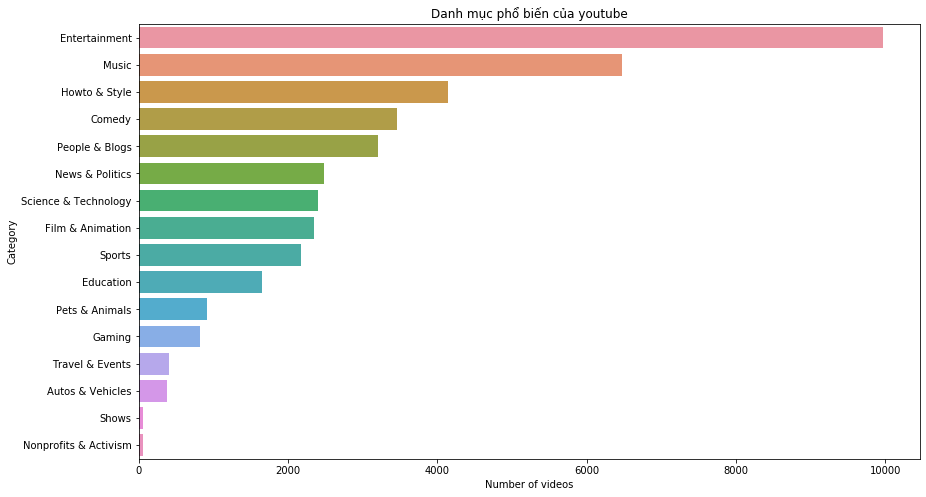

In [34]:
fig, ax = plt.subplots(figsize=(14,8))

categories = data_df['category_name'].value_counts(sort=True, ascending=False)
sns.barplot(categories.values, categories.index.values, ax=ax)

plt.xlabel('Number of videos')
plt.ylabel('Category')
plt.title('Danh mục phổ biến của youtube');

In [35]:
categories

Entertainment            9964
Music                    6472
Howto & Style            4146
Comedy                   3457
People & Blogs           3210
News & Politics          2487
Science & Technology     2401
Film & Animation         2345
Sports                   2174
Education                1656
Pets & Animals            920
Gaming                    817
Travel & Events           402
Autos & Vehicles          384
Shows                      57
Nonprofits & Activism      57
Name: category_name, dtype: int64

In [36]:
100 * categories / len(data_df)

Entertainment            24.332707
Music                    15.805026
Howto & Style            10.124789
Comedy                    8.442209
People & Blogs            7.839019
News & Politics           6.073408
Science & Technology      5.863391
Film & Animation          5.726636
Sports                    5.309043
Education                 4.044055
Pets & Animals            2.246697
Gaming                    1.995165
Travel & Events           0.981709
Autos & Vehicles          0.937752
Shows                     0.139198
Nonprofits & Activism     0.139198
Name: category_name, dtype: float64

Biểu đồ trên không bao gồm tất cả các danh mục vì có một số danh mục không có video thịnh hành trong năm thời gian khảo sát.
 
Danh mục giải trí đứng đầu với 9964 video thịnh hành (24.3% video thịnh hành của năm 2017-2018). Sau Giải trí là danh mục Âm nhạc với 6742 video thịnh hành (15.8% video thịnh hành). Sau đó, ở vị trí thứ ba là danh mục hướng dẫn và phong cách với 4146 video thịnh hành (10.12% video thịnh hành).

--> Nhìn vào biểu đồ này, bạn sẽ biết được loại video nào xuất hiện trên danh sách thịnh hành hơn những loại video khác. Cũng 1 phần đánh giá được ngành nào có ảnh hưởng lớn nhất đến Youtube. Cũng như giúp nhà phát triển nắm bắt được xu hướng của người dùng để đưa ra các quảng cáo phù hợp.

# 5. Tổng kết

+ Phân tích tập dữ liệu chứa thông tin về các video thịnh hành trên YouTube trong 205 ngày. Tập dữ liệu được thu thập vào năm 2017 và 2018. Nó chứa 40949 mục nhập video.
+ Một số video có thể xuất hiện trên danh sách video thịnh hành hơn một ngày. Tập dữ liệu của chúng tôi chứa 40494 mục nhập nhưng không dành cho 40494 video duy nhất mà dành cho 6351 video đơn vị.
+ Các từ 'Offical', 'Video', 'Trailer', 'New' và 'Music' cũng phổ biến trong các tiêu đề video thịnh hành.
+ Có một mối tương quan thuận chặt chẽ giữa số lượt xem và số lượt thích của các video thịnh hành: Khi một trong số chúng tăng lên thì video còn lại tăng và ngược lại.
+ Có một mối tương quan tích cực mạnh giữa số lượng thích và số lượng bình luận, và yếu hơn một chút giữa số lượng không thích và số lượng bình luận.
+ Danh mục có số lượng video thịnh hành lớn nhất là 'Giải trí', tiếp theo là danh mục 'Âm nhạc', tiếp theo là danh mục 'Hướng dẫn & Phong cách'.